# Importing libraries

In [2]:
# importing libraries

import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy.optimize import curve_fit
%matplotlib inline

# Loading Data

In [3]:
# Loading the radial velocity data from 55cnc.txt

data = ascii.read('55cnc.txt')

#displaying the first 5 rows (TESTING)

data[:5]

HJD,Radial_Velocity,Radial_Velocity_Uncertainty
days,m / s,m / s
float64,float64,float64
2449676.0632,131.910003662,4.8400002
2449767.77441,22.6000003815,2.5699999
2449768.83203,-5.48999977112,2.6800001
2449793.79785,107.309997559,1.52
2450056.98828,116.669998169,1.6199999


# Extracting Columns

In [4]:
# extracting data into variables time, rv, and uncertainty

time = data['HJD']
rv = data['Radial_Velocity']
uncertainty = data['Radial_Velocity_Uncertainty']

# Plotting the data

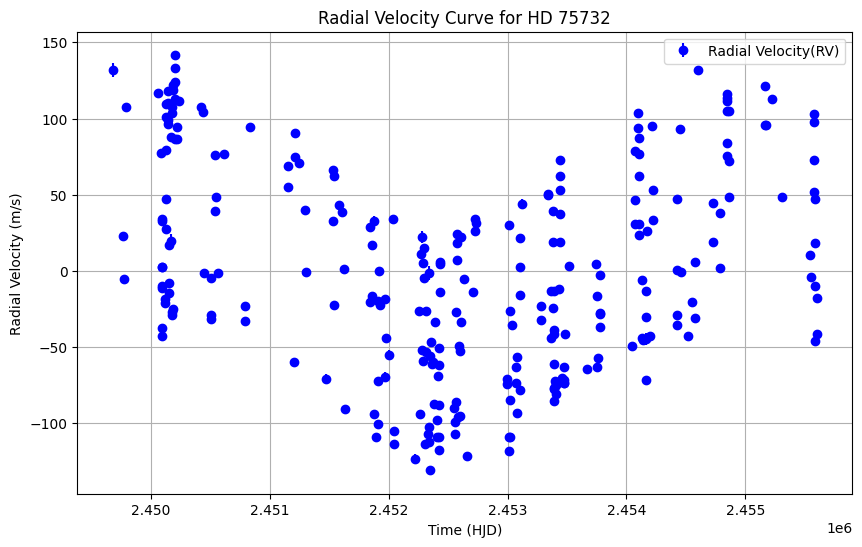

In [5]:
# Creating plot

plt.figure(figsize=(10,6))

# plotting the RV with time and using errorbars for uncertainty

plt.errorbar(time,rv,yerr=uncertainty,fmt='o', color='blue', label='Radial Velocity(RV)')

# Adding labels and a title

plt.xlabel('Time (HJD)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Radial Velocity Curve for HD 75732')

# adding grid and legend 

plt.grid(True)
plt.legend()


#Save plot as a pdf
plt.savefig('radial_velocity_curve.pdf', format='pdf')


#show plot
plt.show()


Fitted parameters: A=47.91796694110973, B=4806.954703003165, C=2218357.206093946, D=-1.4182673981452345


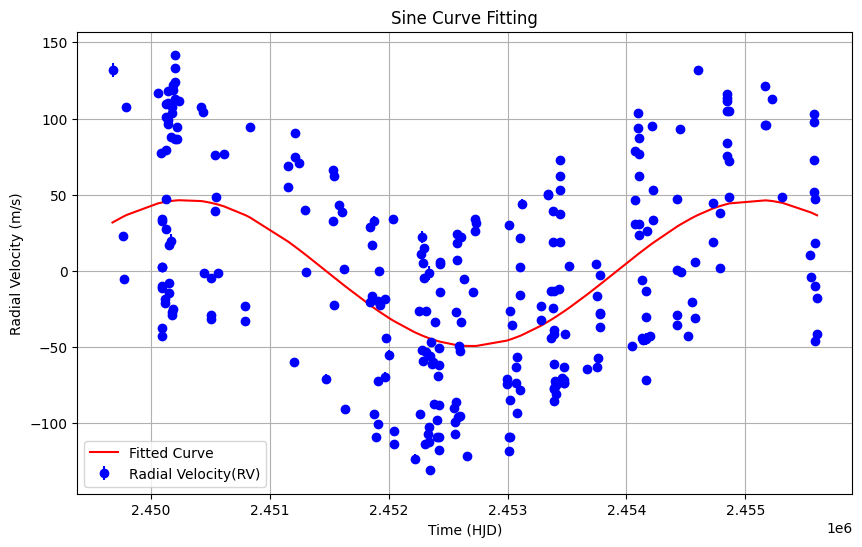

In [6]:
def sine_function(x, A, B, C, D):
    return A * np.sin(2 * np.pi / B * (x - C)) + D

initial = [50,0.05*1e6,2.4525,0]

params, cov = curve_fit(sine_function, time, rv, sigma=uncertainty, absolute_sigma=True,p0=initial)
A_fit, B_fit, C_fit, D_fit = params
print(f"Fitted parameters: A={A_fit}, B={B_fit}, C={C_fit}, D={D_fit}")
# Generate y values using the fitted parameters
y_fit = sine_function(time, A_fit, B_fit, C_fit, D_fit)

plt.figure(figsize=(10,6))

plt.errorbar(time,rv,yerr=uncertainty,fmt='o', color='blue', label='Radial Velocity(RV)')
plt.plot(time, y_fit, label='Fitted Curve', color='red')

plt.xlabel('Time (HJD)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('Radial Velocity Curve for HD 75732')
plt.grid(True)
plt.legend()

plt.title('Sine Curve Fitting')


#Save plot as a pdf
plt.savefig('sine_curve_fitting.pdf', format='pdf')
plt.show()

## Plotted Residuals

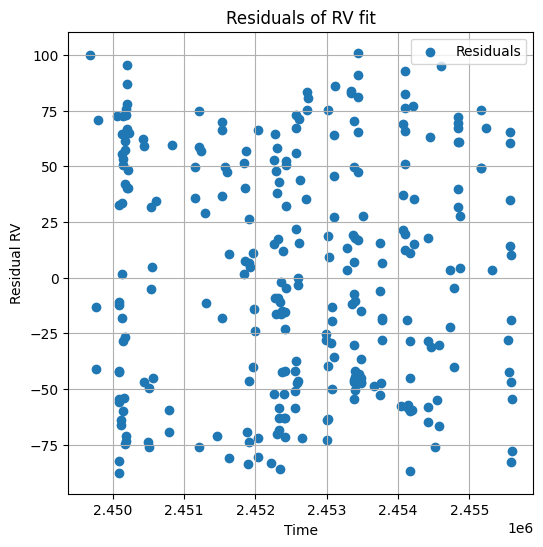

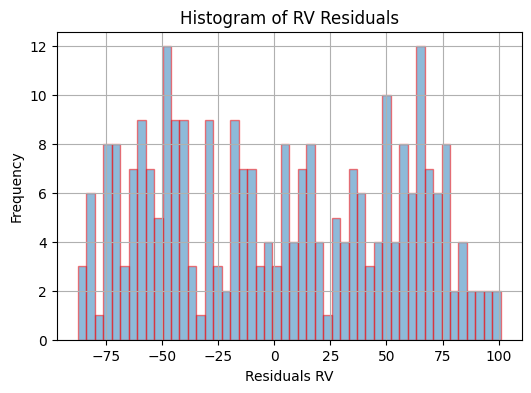

In [7]:
# Generate residuals
residuals = rv - y_fit

plt.figure(figsize=(6,6))
plt.scatter(time, residuals,label="Residuals")
plt.xlabel("Time")
plt.ylabel("Residual RV")
plt.title("Residuals of RV fit")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.hist(residuals,bins=50,edgecolor="red",alpha=0.5)
plt.xlabel("Residuals RV")
plt.ylabel("Frequency")
plt.title("Histogram of RV Residuals")

plt.grid(True)
plt.savefig("residual_histogram.pdf")
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Skip metadata (first 52 lines) — then the data starts
data = np.loadtxt('55cnc.txt', skiprows=52)

# Now extract the columns
time = data[:, 0]
rv = data[:, 1]
uncertainty = data[:, 2]

In [9]:
def rv_model_2planet(x, A1, B1, C1, A2, B2, C2, D):
    return sine_function(x, A1, B1, C1, D) + sine_function(x, A2, B2, C2, D)

In [10]:
from scipy.optimize import curve_fit

initial_guess = [50,0.05*1e6,2.4525,10,0.0035*1e6,2.4535,0]

popt2, pcov2 = curve_fit(rv_model_2planet, time, rv, sigma=uncertainty, absolute_sigma=True, p0=initial_guess)

rv_fit2 = rv_model_2planet(time, *popt2)

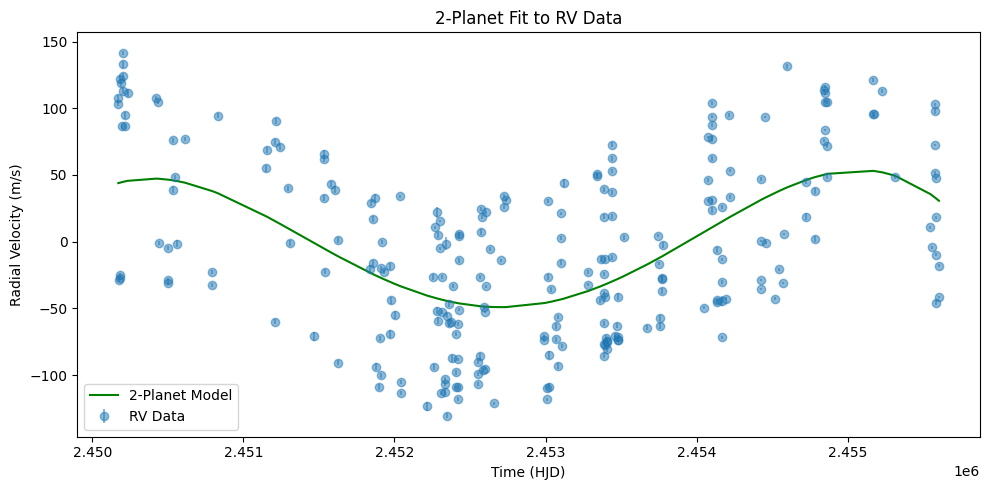

In [11]:
plt.figure(figsize=(10, 5))
plt.errorbar(time, rv, yerr=uncertainty, fmt='o', alpha=0.5, label='RV Data')
plt.plot(time, rv_fit2, color='green', label='2-Planet Model')
plt.xlabel('Time (HJD)')
plt.ylabel('Radial Velocity (m/s)')
plt.title('2-Planet Fit to RV Data')
plt.legend()
plt.tight_layout()
plt.savefig("twoplanet_fit.pdf")
plt.show()

In [12]:
residuals2 = rv - rv_fit2

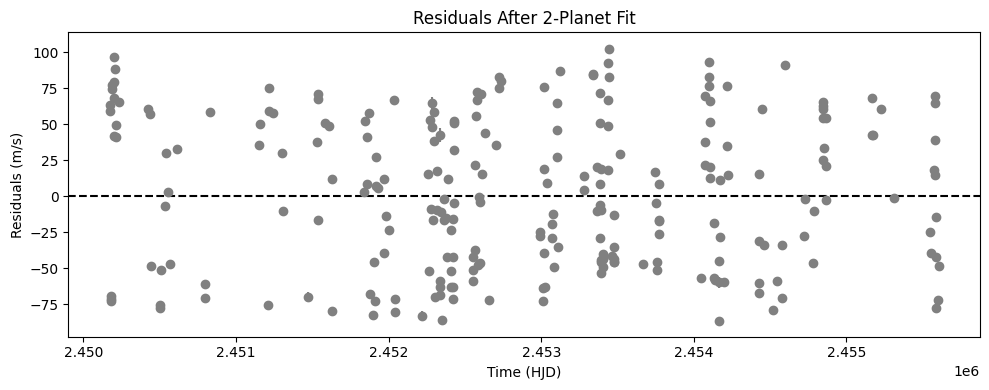

In [13]:
plt.figure(figsize=(10, 4))
plt.errorbar(time, residuals2, yerr=uncertainty, fmt='o', color='gray')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Time (HJD)')
plt.ylabel('Residuals (m/s)')
plt.title('Residuals After 2-Planet Fit')
plt.tight_layout()
plt.savefig("residuals_twoplanet.pdf")
plt.show()

In [14]:
print(f"STD of 2-planet residuals: {np.std(residuals2):.2f}")
print(f"Mean uncertainty: {np.mean(uncertainty):.2f}")

STD of 2-planet residuals: 51.70
Mean uncertainty: 1.77


In [15]:
# M_exoplanet = (K / 28.4) * (P / 365)^(1/3) * (M_star)^2/3 
# K = amplitude (m/s), p = period (days), m_star = stellar mass in solar masses 

def calculate_mass(K, P, M_star=0.905):
    return ( K / 28.4) * (P / 365)**(1/3) * (M_star)**(2/3)

# Convert periods from seconds to days for fit parameters (B = period)
P1 = B_fit / (24 * 60 * 60) # seconds to days 
mass1 = calculate_mass(np.abs(A_fit), P1)
print(f"Estimated mass for planet 1 (1-planet fits): {mass1:3f} Jupiter masses")
print(f"Closest match: 55 Cancri f")
# for 2-planet model (A1, B1, A2, B2)
A1, B1, C1, A2, B2, C2, D = popt2
P2_1 = B1 / (24 * 60 * 60)
P2_2 = B2 / (24 * 60 * 60)
mass2_1 = calculate_mass(np.abs(A1), P2_1)
mass2_2 = calculate_mass(np.abs(A2), P2_2)

print(f"Estimated mass for planet 1 (2-planet fit): {mass2_1:.3f} Jupiter masses")
print(f"Closest Match: None (note: may be fitting error or overfitting of noise)")
print(f"Estimated mass for planet 2 (2-planet fit): {mass2_2:.3f} Jupiter masses")
print(f"Closest Match: 55 Cancri e (note: need to fix also, may be because of initial guesses and bounds of amplitude and period")

print(f"Planet 1: A1 = {A1:.2f} m/s, B1 = {B1:.2f} sec → {B1 / (24*60*60):.2f} days")
print(f"Planet 2: A2 = {A2:.2f} m/s, B2 = {B2:.2f} sec → {B2 / (24*60*60):.2f} days")


Estimated mass for planet 1 (1-planet fits): 0.084327 Jupiter masses
Closest match: 55 Cancri f
Estimated mass for planet 1 (2-planet fit): 56.967 Jupiter masses
Closest Match: None (note: may be fitting error or overfitting of noise)
Estimated mass for planet 2 (2-planet fit): 2.396 Jupiter masses
Closest Match: 55 Cancri e (note: need to fix also, may be because of initial guesses and bounds of amplitude and period
Planet 1: A1 = -14815.46 m/s, B1 = 50140.69 sec → 0.58 days
Planet 2: A2 = 1019.61 m/s, B2 = 11443.26 sec → 0.13 days
